# Entrega Final

<p style="text-align: left;"><span style="color: #000000;">Grupo 1:</span></p>
<ul>
<li style="text-align: left;"><span style="color: #000000;">Felipe Bedoya Casta&ntilde;o</span></li>
<li style="text-align: left;"><span style="color: #000000;">Mirai Alejandro Kaneko</span></li>
<li style="text-align: left;"><span style="color: #000000;">Alejandro Giraldo Sarria</span></li>
<li style="text-align: left;"><span style="color: #000000;">Marianela Arcila</span></li>
</ul>

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import skimage
import skimage.io
import skimage.morphology as morph
from skimage.measure import label,regionprops,find_contours
import skimage.color as color

from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border

%matplotlib inline

# Procesamiento
<hr>
<p>Se intenta resolver el problema de la iluminacion no uniforme con un fit de paraboloide.</p>
<p>La imagen se corta 50 pixeles a la izquierda y abajo para quitar la escala de la imagen.</p>
<p></p>

Threshold: 166


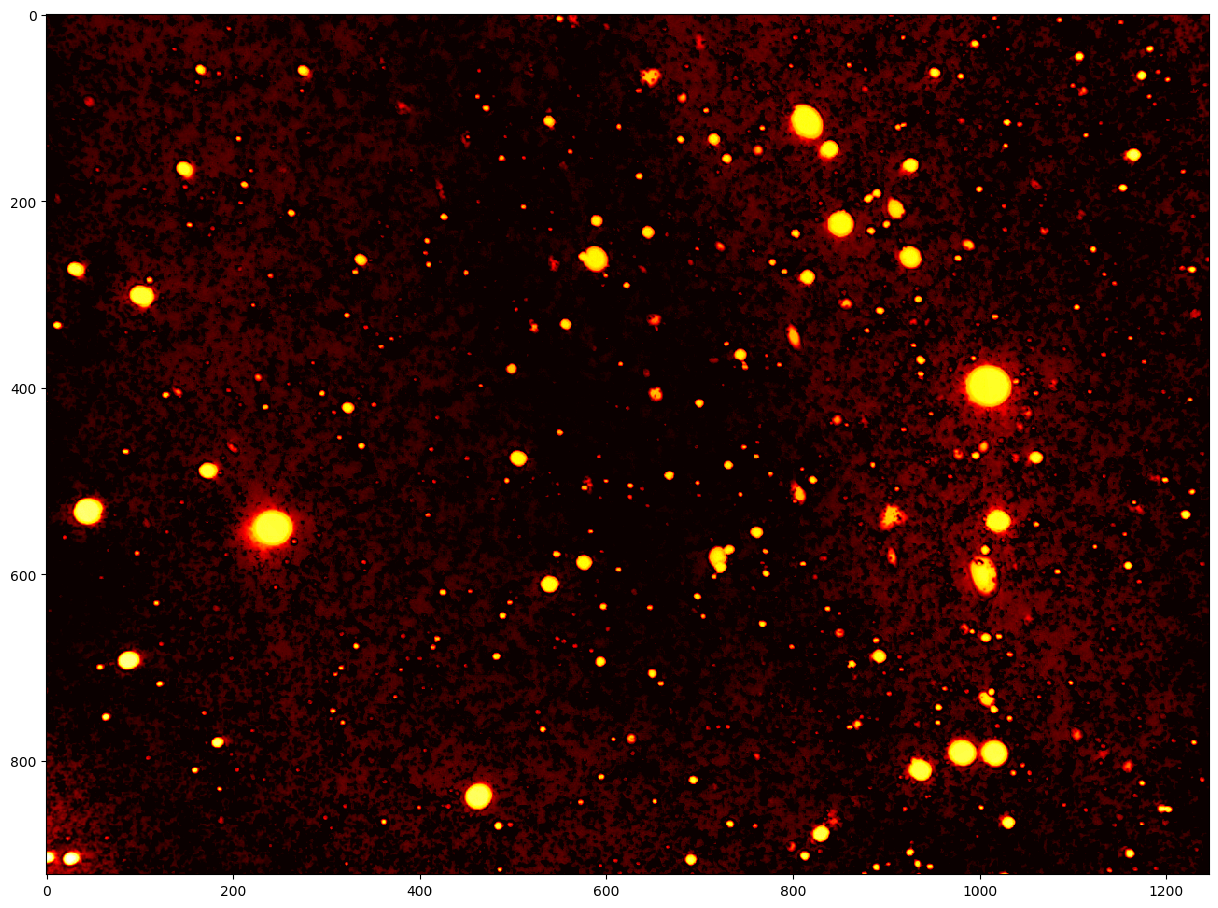

In [2]:
#######SELECCIONAR IMAGEN#######
## 1 - 17 ##
num = 1
################################

ruta = 'imagenes/img' + str(num) + '.bmp'

img = cv2.imread(ruta,0)
img_resize = img[:-50,50:]

len_x = img_resize.shape[0]
len_y = img_resize.shape[1]

z = img_resize.flatten()
z = z.reshape((len(z),1))
y = np.array([ i for i in range(len_y) ]*len_x)
x = np.array([ [i]*len_y for i in range(len_x)  ])
x = x.flatten()
xx = np.power(x, 2)
yy = np.power(y, 2)
xy = x*y
ones = np.ones(len(z))
H = np.array([ xx, yy, xy, x, y, ones ])
H = H.T
c = np.dot(H.T, H)
c = np.linalg.inv(c) 
c = np.dot(c, H.T)
c = np.dot(c, z)
z_fit = np.dot(H, c)
z_fit = z_fit.reshape((len_x, len_y)).astype(np.uint8)
res = cv2.subtract(img_resize,z_fit)
thold = np.max(res)
image = res * (res < thold)
print('Threshold:',thold)
plt.figure(figsize=(15,15),dpi = 100)
plt.imshow(image,cmap='hot');

# Binarizacion
<hr><hr>
<p>Hay que binarizar la imagen para realizar el etiquetado pero entonces hay varias consideraciones</p>
<p>El threshold de umbralizacion cambia drasticamente la cantidad de etiquetas</p>
<p>Para esto se utilizo un ejemplo de segmentacion y etiquetado como base <a href='https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html' target="_blank">aqui</a>.</p>
<p>Problemas que persisten:</p>
<p>Cuando la gota es muy grande y muy brillante se "come" a lo que hay alrededor.</p>
<p>Cuando el fondo es extremadamente cercano al color de las gotas sobre el, no logra separar limpiamente las gotas del fondo. Imagenes como la 3 o 7 que tienen alta iluminacion en los bordes, en especial el izquierdo.</p>
<p>Diferente binarizacion? Diferente a paraboloide para iluminacion?</p>

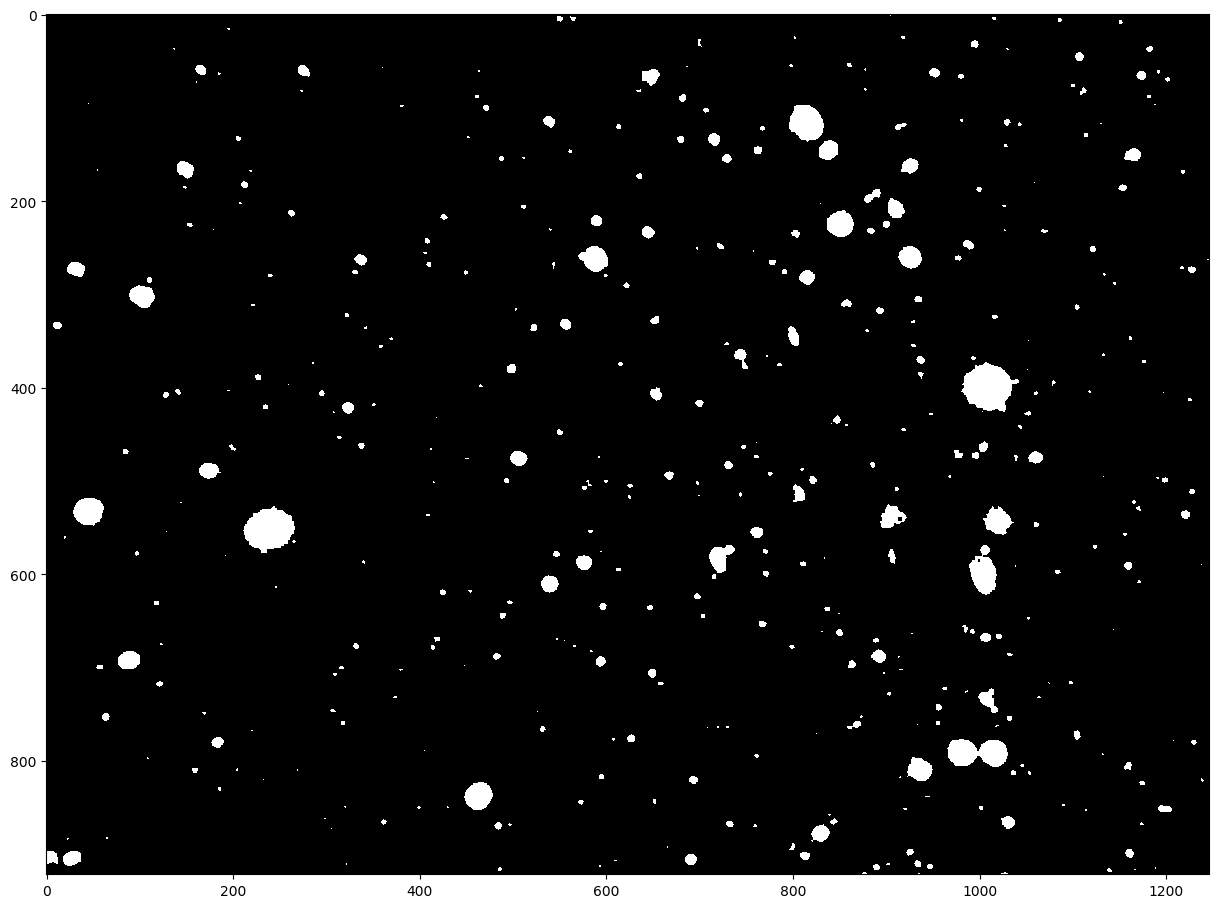

In [3]:
plt.figure(figsize=(15,15),dpi = 100)

# https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html
#Thresholding automatico con el metodo de Otsu
tholdo = threshold_otsu(image)

#Cierre binario
bw = morph.closing(res > tholdo, morph.square(3))

#Mostrar cierre binario
plt.imshow(bw,cmap='gray')

# Etiquetado
<hr><hr>
<p>Asumiendo que la imagen binaria es buena.</p>
<p>Saber la escala en pixeles a unidades metricas.</p>
<p>Esto para saber cuanto mide cada cosa en metrica obviamente, pero en el caso de las areas, las mas pequenas son de 1. Entonces saber el umbral de relevancia de las areas. Eso elimina puntos muy pequenos que no pueden ser gotas, aunque como es una foto de un volumen, el tamano aparente puede ser un punto de consideracion, pero aqui se mide area y diametro aparente.</p>

Etiquetas: 416
Area promedio: 67.0576923076923
Diametro promedio: 6.5211132343597935


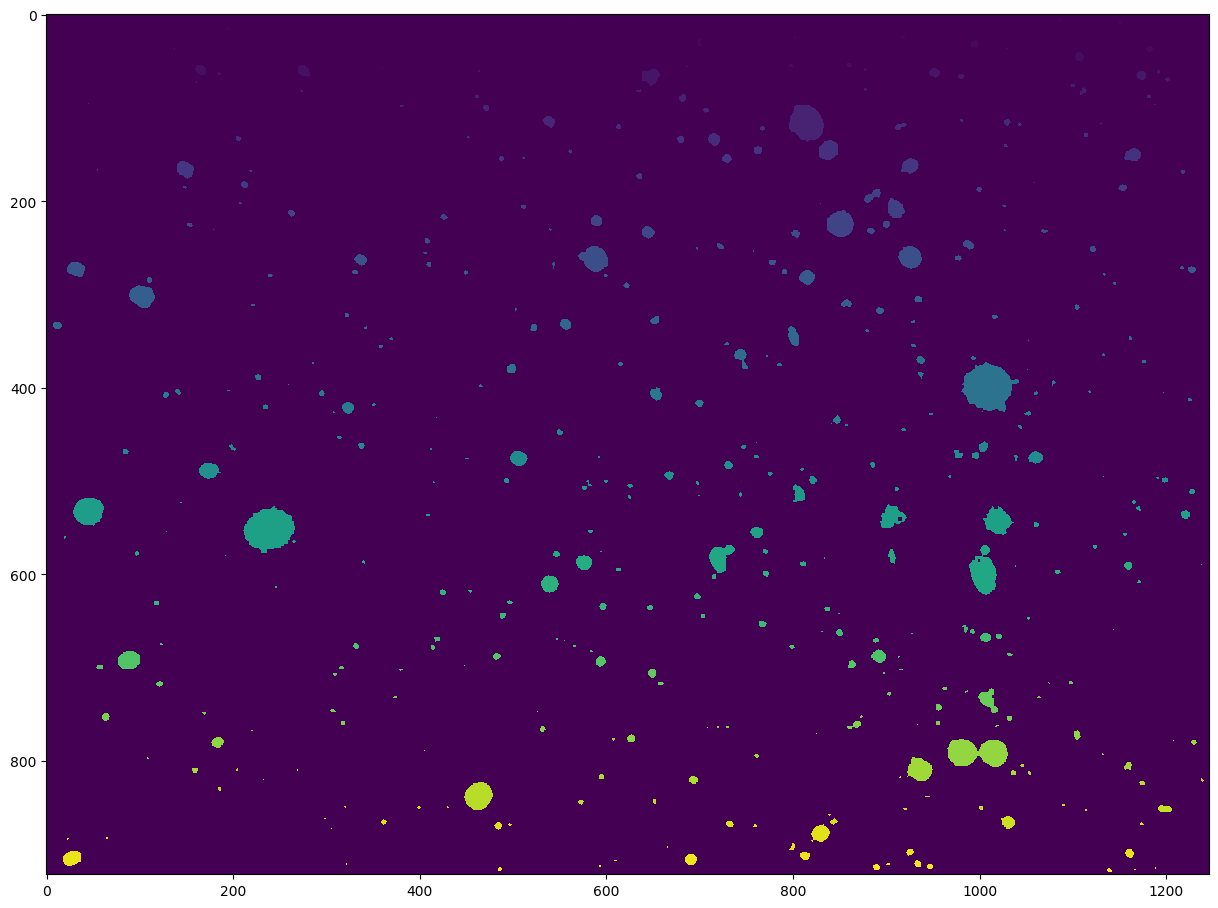

In [5]:
plt.figure(figsize=(15,15),dpi = 100)

#Despejar bordes.
cleared = clear_border(bw)

#Eqtiquetar
label_image = label(cleared)

#Extraer propiedades.
props = regionprops(label_image)

print('Etiquetas:',len(props))

area = []
diametroseq = []

for i in range(0,len(props)):
    area.append(props[i].area)
    diametroseq.append(props[i].equivalent_diameter)

#UNIDADES EN PIXELES
print('Area promedio:',np.mean(area))
print('Diametro promedio:',np.mean(diametroseq))

plt.imshow(label_image)